In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import datetime
#Import data
nasa = pd.read_csv("nasa_facebook_statuses.csv", 
            usecols=["status_published","num_reactions",
                    "num_comments","num_shares","num_likes"])

In [3]:
#Convert column type to date time
nasa["status_published"] = pd.to_datetime(nasa["status_published"])
#Select observations between two datetimes - May 2015
filter =(nasa['status_published'] >= '2016-5-1') & (nasa['status_published'] < '2016-6-1')
nasa = nasa[filter]
#Add column with day only
nasa['day'] = nasa.apply(lambda row: row["status_published"].day,axis=1)
#Remove column with status_published - we don't need it anymore
nasa.drop('status_published', axis='columns', inplace=True)
#Group all columns by sum
nasa_by_day = nasa.groupby(by='day').sum()
nasa_by_day.head()

,num_reactions,num_comments,num_shares,num_likes
day,,,,
1,62629,727,4403,60243
2,188255,2328,23897,177989
3,53700,770,10858,50264
4,140098,1776,23360,133302
5,93146,1070,7627,89657


<Axes: title={'center': 'NASA Facebook activity'}, xlabel='day'>

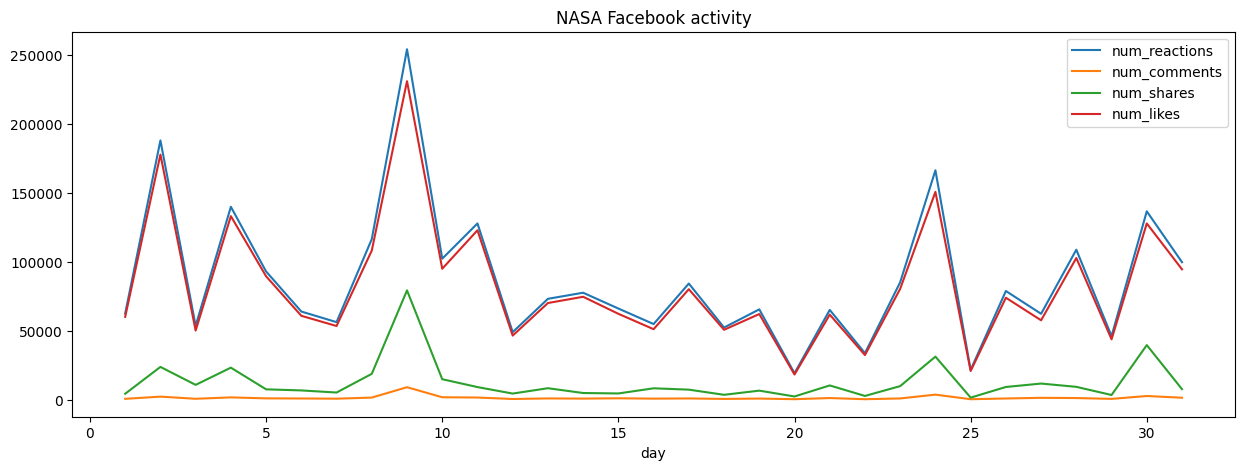

In [4]:
nasa_by_day.plot(figsize=(15,5), title = "NASA Facebook activity")

<Axes: title={'center': 'NASA Facebook activity'}, xlabel='day'>

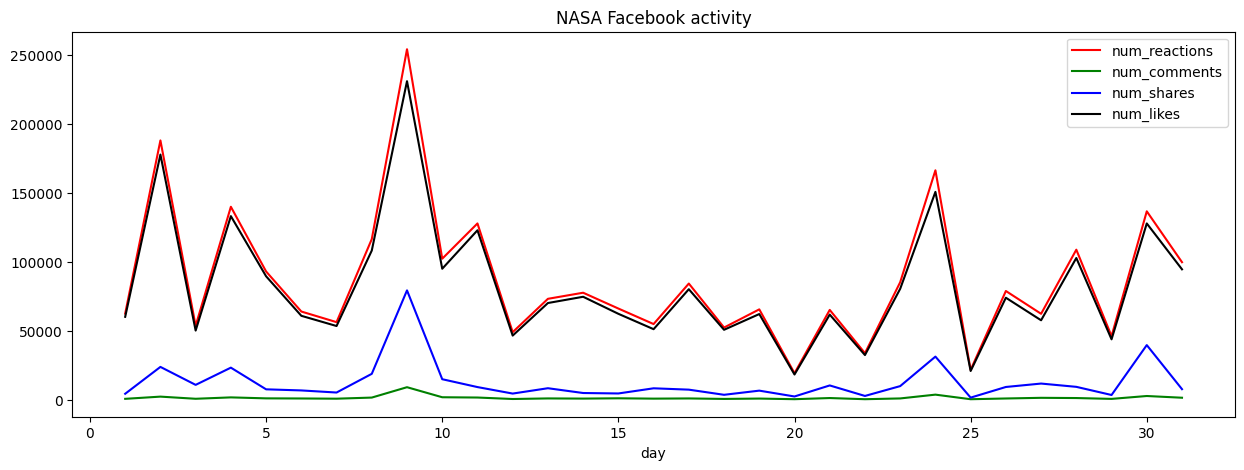

In [6]:
nasa_by_day.plot(figsize=(15,5), title = "NASA Facebook activity", color = ['r','g','b','k'])